<a href="https://colab.research.google.com/github/GordonHeg/Machine-Learning-Group-Assignment-Transfer-Learning-/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1


In [2]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1"

# List all files and directories in the dataset folder
for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")
    for dir_name in dirs:
        print(f"  Subdirectory: {dir_name}")
    # for file_name in files:
    #     print(f"  File: {file_name}")


Directory: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1
  Subdirectory: Test
  Subdirectory: train
  Subdirectory: test
  Subdirectory: Train
  Subdirectory: Meta
  Subdirectory: meta
Directory: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/Test
Directory: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/train
  Subdirectory: 39
  Subdirectory: 40
  Subdirectory: 31
  Subdirectory: 17
  Subdirectory: 16
  Subdirectory: 15
  Subdirectory: 11
  Subdirectory: 10
  Subdirectory: 36
  Subdirectory: 18
  Subdirectory: 20
  Subdirectory: 4
  Subdirectory: 14
  Subdirectory: 21
  Subdirectory: 26
  Subdirectory: 3
  Subdirectory: 8
  Subdirectory: 13
  Subdirectory: 27
  Subdirectory: 41
  Subdirectory: 30
  Subdirectory: 2
  Subdirectory: 12
  Subdirectory: 29
  Subdirectory: 24
  Subdirectory: 38
  Subdirectory: 5
  Subdirectory: 42
  Subdirectory: 35
  Subdirecto

In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Define the path to your training directory
train_dir = '/root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/train'

# List all subdirectories (which correspond to different classes)
all_classes = os.listdir(train_dir)

# Sort the class names alphabetically
sorted_classes = sorted(all_classes, key=lambda x: int(x))

# Select the first 10 classes after sorting
selected_classes = sorted_classes[:10]

print(selected_classes)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [10]:
# Initialize lists to store images and labels
# images = []
# labels = []

# # Loop through the selected classes to load images and their corresponding labels
# for class_id, class_name in enumerate(selected_classes):
#     class_dir = os.path.join(train_dir, class_name)
#     for img_file in os.listdir(class_dir):
#         img_path = os.path.join(class_dir, img_file)
#         try:
#             img = Image.open(img_path).resize((224, 224))  # Resize to (224, 224) for VGG16
#             img = np.array(img)  # Convert image to numpy array

#             if img.shape[2] == 4:  # Handle RGBA images if any
#                 img = img[:, :, :3]

#             images.append(img)
#             labels.append(class_id)  # Use class_id as label
#         except Exception as e:
#             continue

# # Convert lists to numpy arrays for use in the model
# X = np.array(images)
# y = np.array(labels)

Reducing size of each class as RAM is crashing in spliting and conveting into float32 conversion

In [4]:
# Load a subset of data for each class (e.g., first 500 images per class)
max_images_per_class = 500
images = []
labels = []

for class_id, class_name in enumerate(selected_classes):
    class_dir = os.path.join(train_dir, class_name)
    img_files = os.listdir(class_dir)[:max_images_per_class]
    for img_file in img_files:
        img_path = os.path.join(class_dir, img_file)
        try:
            img = Image.open(img_path).resize((224, 224))
            img = np.array(img)
            if img.shape[2] == 4:  # Handle RGBA
                img = img[:, :, :3]
            images.append(img)
            labels.append(class_id)
        except Exception as e:
            continue

X = np.array(images)
y = np.array(labels)


In [5]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

# Optionally, normalize the images (scale pixel values to [0, 1] range)
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

In [6]:
import pandas as pd
import os
from PIL import Image
import numpy as np

# Paths
test_csv_path = '/root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/Test.csv'
test_dir = '/root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/'

# Load the Test.csv file
test_df = pd.read_csv(test_csv_path)

# Filter for selected class IDs (0-9)
selected_classes = list(range(10))  # Class IDs 0 to 9
filtered_test_df = test_df[test_df['ClassId'].isin(selected_classes)]

# Initialize lists to store test images and labels
test_images = []
test_labels = []

# Loop through the filtered DataFrame
for _, row in filtered_test_df.iterrows():
    img_path = os.path.join(test_dir, row['Path'])
    class_id = row['ClassId']
    try:
        # Load, resize, and preprocess image
        img = Image.open(img_path).resize((224, 224))  # Resize for VGG16
        img = np.array(img)
        if img.shape[2] == 4:  # Handle RGBA images
            img = img[:, :, :3]
        test_images.append(img)
        test_labels.append(class_id)
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")
        continue

# Convert lists to numpy arrays
X_test = np.array(test_images)
y_test = np.array(test_labels)

# Normalize test images to range [0, 1]
X_test = X_test.astype('float32') / 255.0

# Print shapes to verify
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")


Test data shape: (4800, 224, 224, 3)
Test labels shape: (4800,)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from tensorflow.keras.utils import Sequence
import numpy as np

# Define a data generator to handle large datasets
class DataGenerator(Sequence):
    def __init__(self, X, y, batch_size):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.indices = np.arange(len(y))

    def __len__(self):
        return int(np.ceil(len(self.y) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_X = self.X[batch_indices]
        batch_y = self.y[batch_indices]
        return batch_X, batch_y

# Create data generators for training and validation
batch_size = 16  # Reduce batch size to manage memory
train_gen = DataGenerator(X_train, y_train, batch_size)
val_gen = DataGenerator(X_val, y_val, batch_size)





In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger

# Load the pretrained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to retain pretrained weights
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)  # Add a dense layer
x = Dropout(0.5)(x)  # Add dropout to reduce overfitting
output = Dense(10, activation='softmax')(x)  # Final layer for 10 classes

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 6,425,354 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
# Callbacks for tracking and optimization
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(patience=5, monitor='val_loss', mode='min', restore_best_weights=True)
csv_logger = CSVLogger('training_log.csv')

# Train the model using the generators
history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[checkpoint, early_stopping, csv_logger],
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


232/232 ━━━━━━━━━━━━━━━━━━━━ 49s 162ms/step - accuracy: 0.2594 - loss: 2.0938 - val_accuracy: 0.5529 - val_loss: 1.4440
Epoch 2/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.5104 - loss: 1.4301 - val_accuracy: 0.6577 - val_loss: 1.1701
Epoch 3/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.6025 - loss: 1.1974 - val_accuracy: 0.6976 - val_loss: 1.0200
Epoch 4/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - accuracy: 0.6808 - loss: 1.0003 - val_accuracy: 0.6998 - val_loss: 0.9106
Epoch 5/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.7150 - loss: 0.8701 - val_accuracy: 0.7635 - val_loss: 0.8337
Epoch 6/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.7247 - loss: 0.8337 - val_accuracy: 0.7646 - val_loss: 0.7988
Epoch 7/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.7534 - loss: 0.7853 - val_accuracy: 0.7829 - val_loss: 0.7389
Epoch 8/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.7814 - loss: 0.7168 - val_accura

In [12]:
from sklearn.metrics import accuracy_score, classification_report

# Load the best model
model.load_weights('best_model.keras')


test_gen = DataGenerator(X_test, y_test, batch_size)

# Predict on the test set
test_predictions = model.predict(test_gen)
test_classes = np.argmax(test_predictions, axis=1)

# Evaluate accuracy
print(f"Test Accuracy: {accuracy_score(y_test, test_classes):.4f}")

# Detailed classification report
print(classification_report(y_test, test_classes))


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step
Test Accuracy: 0.7544
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        60
           1       0.87      0.85      0.86       720
           2       0.82      0.66      0.73       750
           3       0.54      0.61      0.57       450
           4       0.85      0.71      0.77       660
           5       0.70      0.75      0.72       630
           6       0.77      0.95      0.85       150
           7       0.63      0.80      0.71       450
           8       0.68      0.76      0.72       450
           9       0.93      0.84      0.88       480

    accuracy                           0.75      4800
   macro avg       0.76      0.77      0.76      4800
weighted avg       0.77      0.75      0.76      4800



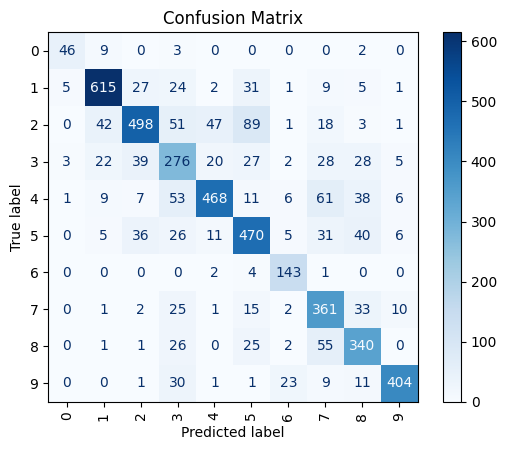

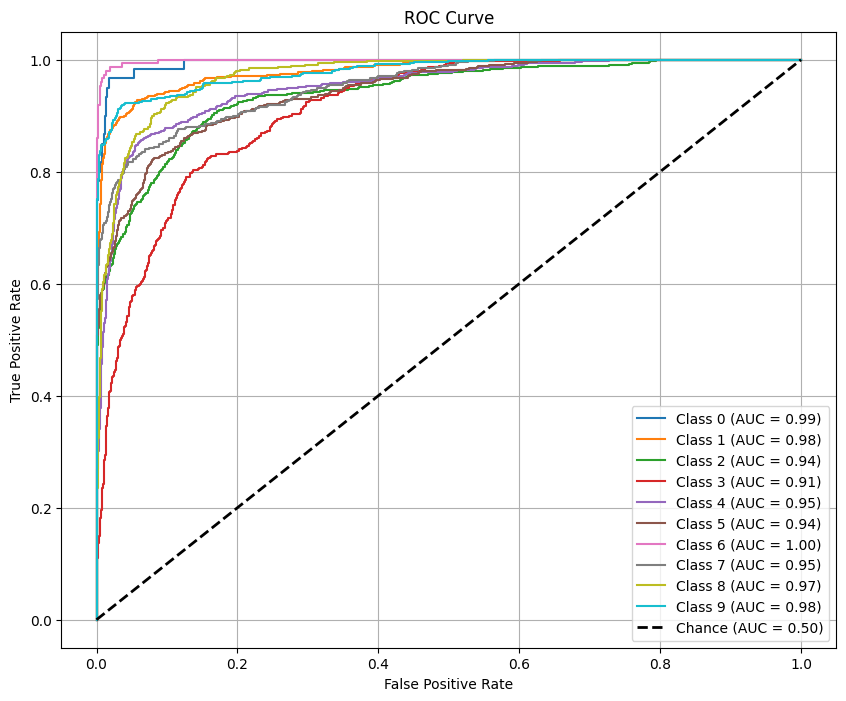

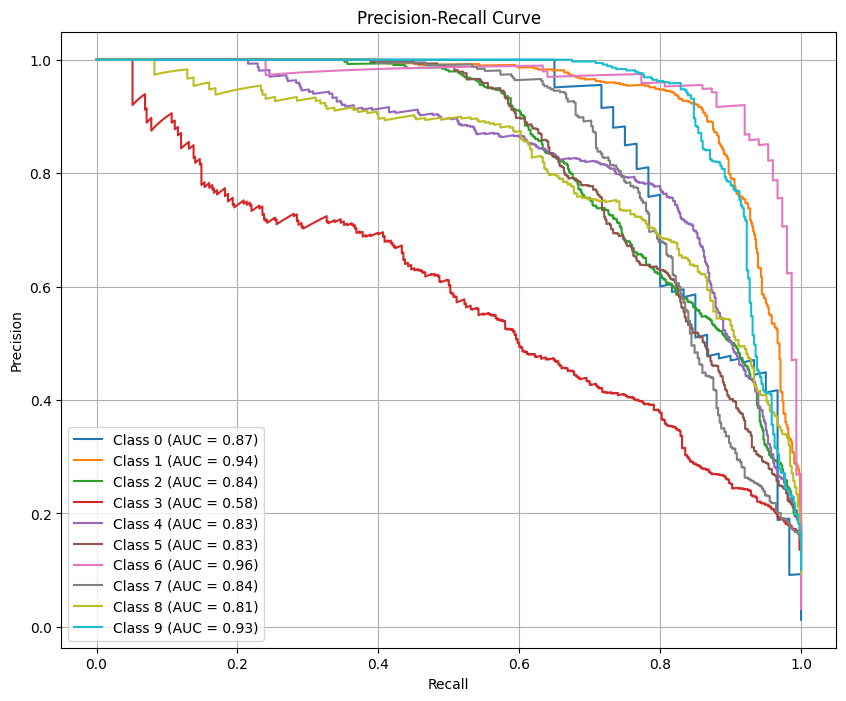

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
import numpy as np

# Confusion Matrix
cm = confusion_matrix(y_test, test_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=selected_classes)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve (for multiclass, calculate individual class ROC curves)
fpr = {}
tpr = {}
roc_auc = {}

# One-hot encode y_test for ROC analysis
y_test_onehot = np.zeros((len(y_test), len(selected_classes)))
y_test_onehot[np.arange(len(y_test)), y_test] = 1

for i, class_name in enumerate(selected_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], test_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(selected_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {class_name} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Chance (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Precision-Recall Curve
precision = {}
recall = {}
pr_auc = {}

for i, class_name in enumerate(selected_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_onehot[:, i], test_predictions[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plot Precision-Recall Curves
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(selected_classes):
    plt.plot(recall[i], precision[i], label=f"Class {class_name} (AUC = {pr_auc[i]:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid()
plt.show()
